In [6]:
#default imports 
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math


## R1 - NOTA 6: 

Segmenta ou filtra os círculos maiores da imagem baseado em cores ou canais da imagem ou por exemplos com contornos e produz output 

visual. Exibe a área e o centro de massa da imagem. Use circulo.png. Essa rubrica pode ser feito no jupyter notebook ou google Colab.

A ÁREA DOS CIRCULOS MAIORES É APROXIMADAMENTE 54739.11039614856


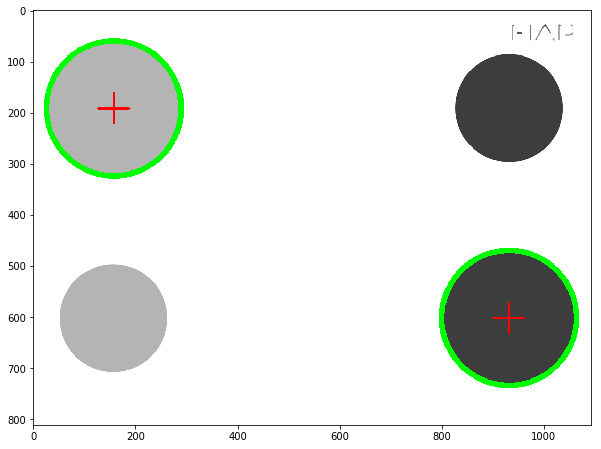

In [7]:
img = cv2.imread('img/circulos.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

# Segmentando os círculos maiores
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=40, minRadius=120, maxRadius=0)

centers = []

if circles is not None:
    circles = np.uint16(np.around(circles))
    for x, y, radius in circles[0,:]:
        # Contorno do circulo
        cv2.circle(cimg, (x, y), radius, (0, 255 ,0), 10)

        # Centro de massa
        cv2.line(cimg, (x - 30, y), (x + 30, y), (255, 0, 0), 3)
        cv2.line(cimg, (x, y - 30), (x, y + 30), (255, 0, 0), 3)

        # Calcular area dos maiores circulos
        area = math.pi * math.pow(radius, 2)

        centers.append((x, y))


plt.figure(figsize = (10,10))   
print('A ÁREA DOS CIRCULOS MAIORES É APROXIMADAMENTE', area)
plt.imshow(cimg)
plt.show()




## R2 - NOTA 8:

Faz o R1, Detecta o contorno dos círculos com a transformada de hough, traça uma reta entre os dois centros dos círculos e calcula o ângulo de 

inclinação da reta em relação o plano horizontal e exibe esse resultado. Essa rubrica pode ser feito jupyter notebook ou google Colab.


O angulo da reta eh aproximadamente: 28.0


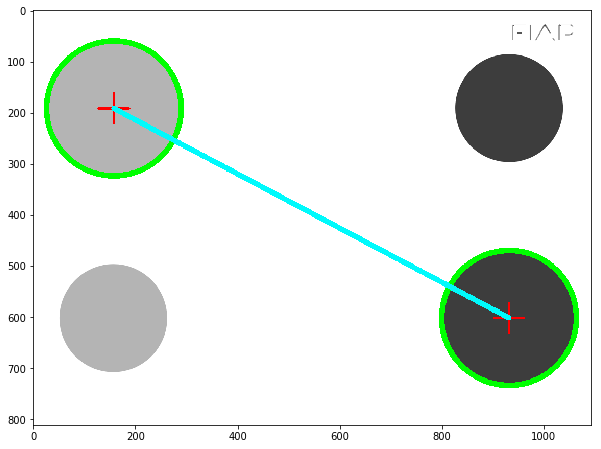

In [8]:
img_copy = cimg.copy()


cv2.line(img_copy, centers[0], centers[1], (0, 250, 252), 10)

def angle_to(pointA, pointB):
  delta_x = int(pointA[0]) - int(pointB[0])
  delta_y = int(pointA[1]) - int(pointB[1])

  return np.round(math.degrees(math.atan2(delta_y, delta_x)))

angle = angle_to(centers[0], centers[1])

angle = angle if angle > 0 else -angle 

print('O angulo da reta eh aproximadamente: ' + str(angle))

plt.figure(figsize = (10,10))   
plt.imshow(img_copy)
plt.show()

## R3 - NOTA 10: 

Faz o R2, realiza o processamento com imagens da webcam (executa um programa .py) e controla um jogo, emulando o pressionamento das teclas em função 

do ângulo de inclinação (ângulo positivo vira para direita, ângulo negativo vira para esquerda se for um jogo de corrida). 


In [9]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

# Programa simples com camera webcam
import os,sys, os.path

#importes para emular precionamento de teclas
from pynput.keyboard import Key, Controller
import pynput

keys = [
    pynput.keyboard.KeyCode.from_char('d'),
    pynput.keyboard.KeyCode.from_char('s'),  
    pynput.keyboard.KeyCode.from_char('w'), 
    pynput.keyboard.KeyCode.from_char('a'),  
]

#Inicializa o controle 
keyboard = Controller()

def image_da_webcam(img):
    """
    ->>> !!!! FECHE A JANELA COM A TECLA ESC !!!! <<<<-
        deve receber a imagem da camera e retornar uma imagems filtrada.
    """
    
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.medianBlur(img,5)
    cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

   # Segmentando os círculos maiores
    circles=cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,2,200,param1=50,param2=100,minRadius=40,maxRadius=60)

    centers = []

    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x,y,radius) in circles:
            # Contorno do circulo
            cv2.circle(cimg, (x, y), radius, (0, 255 ,0), 2)

            # Centro de massa
            cv2.line(cimg, (x - 5, y), (x + 5, y), (255, 0, 0), 1)
            cv2.line(cimg, (x, y - 5), (x, y + 5), (255, 0, 0), 1)

            # Calcular area dos maiores circulos
            area = math.pi * math.pow(radius, 2)


            centers.append((x, y))
    
    if len(centers) == 2:

        cv2.line(cimg, centers[0], centers[1], (0, 250, 252), 10)
        angle = angle_to(centers[0], centers[1])

        if angle < 0:
            angle = angle + 180

        def press_key(key):
            key = (keys.index(key))
            other_keys = keys[:key] + keys[key+1:]

            for i in range(len(other_keys)):
                keyboard.release(other_keys[i])

            keyboard.press(keys[key])


        if ((angle > 0 and angle < 20)  or angle >= 170):
            press_key(keys[0]) 

        elif (angle >= 150 and angle < 170): 
            press_key(keys[2]) 

        elif (angle >= 25 and angle <=100):
            press_key(keys[3]) 


    return cimg

cv2.namedWindow("preview")
vc = cv2.VideoCapture(0)


if vc.isOpened(): # try to get the first frame
    rval, frame = vc.read()
else:
    rval = False

while rval:
    
    img = image_da_webcam(frame)


    cv2.imshow("preview", img)
    cv2.imshow("original", frame)


    rval, frame = vc.read()
    key = cv2.waitKey(20)
    if key == 27: # exit on ESC
        break

cv2.destroyWindow("preview")
vc.release()